In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans

%matplotlib inline 

In [2]:
dataset = pd.read_parquet("data_output_operaciones_hyundai_creta.parquet")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47730 entries, 0 to 47729
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   vin                     47730 non-null  object
 1   visitas                 47730 non-null  int64 
 2   year_modelo             47730 non-null  int64 
 3   ultimo_kilometraje      47730 non-null  int64 
 4   num_servicios           47730 non-null  int64 
 5   num_rep_llantas         47730 non-null  int64 
 6   num_rep_frenos          47730 non-null  int64 
 7   num_rep_amortiguadores  47730 non-null  int64 
 8   num_rep_transmision     47730 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 3.6+ MB


In [4]:
dataset.head()

,vin,visitas,year_modelo,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
0,MB2C22AC0HM100930,2,2017,36754,2,0,0,0,0
1,MB2C22AC0HM100975,1,2017,70777,6,0,1,3,0
2,MB2C22AC0HM100989,6,2017,92340,5,0,2,0,0
3,MB2C22AC0HM100992,4,2017,99854,3,0,0,0,0
4,MB2C22AC0HM101009,4,2017,92012,3,0,2,0,0


In [5]:
grand_i10_variables = dataset.drop(['vin'], axis=1)
grand_i10_variables.head()

,visitas,year_modelo,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
0,2,2017,36754,2,0,0,0,0
1,1,2017,70777,6,0,1,3,0
2,6,2017,92340,5,0,2,0,0
3,4,2017,99854,3,0,0,0,0
4,4,2017,92012,3,0,2,0,0


In [6]:
grand_i10_variables.describe()

,visitas,year_modelo,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
count,47730.000000,47730.000000,4.773000e+04,47730.000000,47730.000000,47730.000000,47730.000000,47730.000000
mean,3.674607,2020.271863,4.772800e+04,4.890740,0.448251,0.160172,0.004798,0.001948
std,2.426300,1.943935,5.303430e+05,5.405983,1.711521,0.620903,0.084637,0.047749
min,1.000000,2017.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2018.000000,7.296250e+03,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2020.000000,1.134850e+04,4.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,2022.000000,4.934825e+04,6.000000,0.000000,0.000000,0.000000,0.000000
max,24.000000,2023.000000,8.888889e+07,76.000000,25.000000,14.000000,4.000000,3.000000


### Normalizando los datos

In [7]:
data_normalizada = (grand_i10_variables-grand_i10_variables.min()) / (grand_i10_variables.max()-grand_i10_variables.min())
data_normalizada.describe()


,visitas,year_modelo,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision
count,47730.000000,47730.000000,47730.000000,47730.000000,47730.000000,47730.000000,47730.000000,47730.000000
mean,0.116287,0.545310,0.000537,0.064352,0.017930,0.011441,0.001199,0.000649
std,0.105491,0.323989,0.005966,0.071131,0.068461,0.044350,0.021159,0.015916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.043478,0.166667,0.000082,0.026316,0.000000,0.000000,0.000000,0.000000
50%,0.086957,0.500000,0.000128,0.052632,0.000000,0.000000,0.000000,0.000000
75%,0.173913,0.833333,0.000555,0.078947,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Búsqueda de la cantidad optima de clusters
- calculo de la similitud de los individuos dentro de los clusters

In [8]:
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, max_iter=300)
    kmeans.fit(data_normalizada)
    wcss.append(kmeans.inertia_)

### Gráfica del codo de Jambú

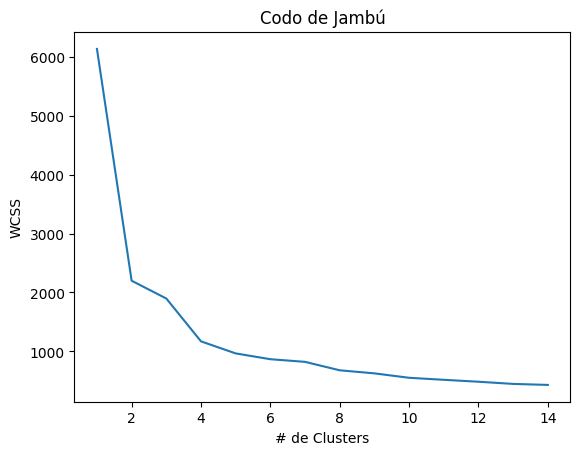

In [9]:
plt.plot(range(1,15), wcss)
plt.title("Codo de Jambú")
plt.xlabel("# de Clusters")
plt.ylabel("WCSS")
plt.show()

In [16]:
clustering = KMeans(n_clusters=4, max_iter=300)
clustering.fit(data_normalizada) ## Aplica el modelo a la base

KMeans(n_clusters=4)

In [18]:
print(clustering.inertia_)

1210.7266617281616


### Aquí se agrega la clasificación al archivo original

In [19]:
dataset["KMeans_Clustering"] = clustering.labels_
dataset.head()

,vin,visitas,year_modelo,ultimo_kilometraje,num_servicios,num_rep_llantas,num_rep_frenos,num_rep_amortiguadores,num_rep_transmision,KMeans_Clustering
0,MB2C22AC0HM100930,2,2017,36754,2,0,0,0,0,2
1,MB2C22AC0HM100975,1,2017,70777,6,0,1,3,0,2
2,MB2C22AC0HM100989,6,2017,92340,5,0,2,0,0,2
3,MB2C22AC0HM100992,4,2017,99854,3,0,0,0,0,2
4,MB2C22AC0HM101009,4,2017,92012,3,0,2,0,0,2


### Visualizando los clusters
- Utilizando PCA

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data_normalizada)
pca_df = pd.DataFrame(data=pca_results, columns=["Componente_1", "Componente_2"])
pca_df_clusters = pd.concat([pca_df, dataset[["KMeans_Clustering"]]], axis=1)
#pca_df_clusters


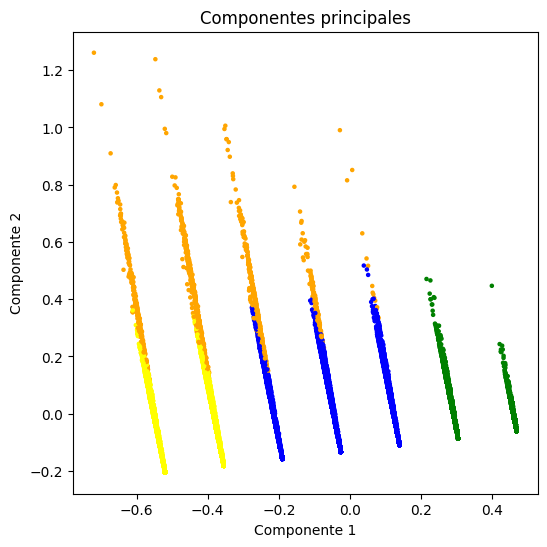

In [21]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel("Componente 1")
ax.set_ylabel("Componente 2")
ax.set_title("Componentes principales")

color_theme = np.array(["blue","green", "yellow","orange", "black"])
ax.scatter(x=pca_df_clusters.Componente_1, y=pca_df_clusters.Componente_2,
          c=color_theme[pca_df_clusters.KMeans_Clustering], s=5)

plt.show()


In [22]:
dataset.to_csv("output_model_data_creta.csv")